In [1]:
import os
import sys
import xarray as xr
import numpy as np
import pandas as pd
import subprocess
from pycpt_functions import *
from scipy.stats import t
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import calendar

In [4]:
#Namelist section
########Work name (name of the case/experiment, try one word)
work='Guate_VolcanFuego'

########Model (choose between ECMWF, CFSv2, GEFS)
model='ECMWF'

########Obs (choose between CHIRPS, TRMM, CPC, IMD1deg, IMDp25deg)
obs='CHIRPS'

########Forecast date  
##-- If ECMWF, it needs to be a Monday or a Thursday! CFSv2: any day; GEFS: Wednesdays.
mon='Jun' 	# Forecast month 
fyr=2018 	# Forecast year
fday=4 	# Forecast day  (Yesterday in CFSv2: real time)
training_season='May-Jul' #only for CFSv2 and GEFS, use 3 months with the initialization as the middle one

nwk=4 # Number of weeks to process (leads)

# Spatial domain for predictor
nla1=32 	# Northernmost latitude
sla1=1 	# Southernmost latitude
wlo1=-103 	# Westernmost longitude
elo1=-75 	# Easternmost longitude
# Spatial domain for predictand
nla2=29 	# Northernmost latitude
sla2=2 	# Southernmost latitude
wlo2=-102 	# Westernmost longitude
elo2=-76 	# Easternmost longitude
# ########Spatial domain for predictor
# nla1=30 	# Northernmost latitude
# sla1=-20 	# Southernmost latitude
# wlo1=73 	# Westernmost longitude
# elo1=155 	# Easternmost longitude
# # Spatial domain for predictand
# nla2=24 	# Northernmost latitude
# sla2=-12 	# Southernmost latitude
# wlo2=90 	# Westernmost longitude
# elo2=150 	# Easternmost longitude

########Some folder and file options:
# Working directory --it should exist!!! (this is the place where the .py functions, notebooks, and .IRIDLAUTH is)
workdir = '/Users/agmunoz/Documents/Angel/S2S_PredictionProject/4CPT/PyCPT/'
rainfall_frequency = False  #False gives total rainfall for forecast periods


########Naming of output files
if rainfall_frequency:
    fprefix = 'RFREQ'
else:
    fprefix = 'PRCP'

print("Now in the work directory:")
%cd $work
workdir = os.getcwd()

Now in the work directory:
[Errno 2] No such file or directory: 'Guate_VolcanFuego'
/Users/agmunoz/Documents/Angel/S2S_PredictionProject/4CPT/PyCPT/iri-pycpt/Guate_VolcanFuego/output


# Probabilistic skill maps

New folder:
[Errno 2] No such file or directory: '/Users/agmunoz/Documents/Angel/S2S_PredictionProject/4CPT/PyCPT/iri-pycpt/Guate_VolcanFuego/output/output'
/Users/agmunoz/Documents/Angel/S2S_PredictionProject/4CPT/PyCPT/iri-pycpt/Guate_VolcanFuego/output
Difference: CCA-noMOS 


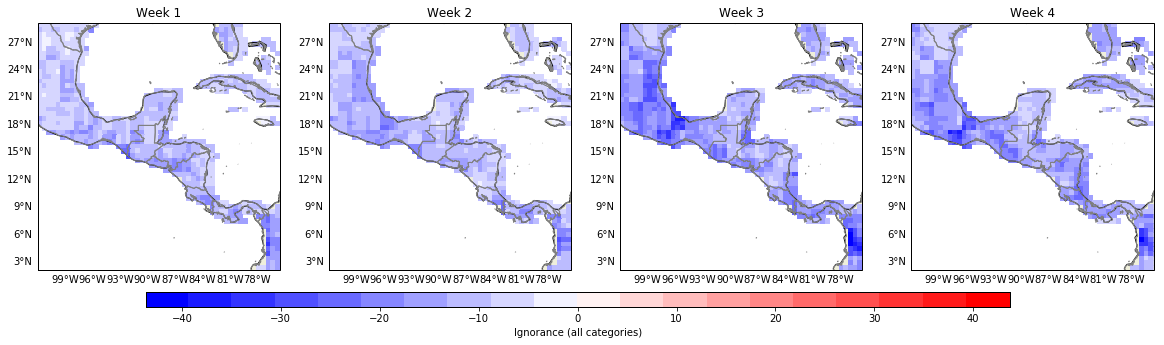

----------------------------------------------



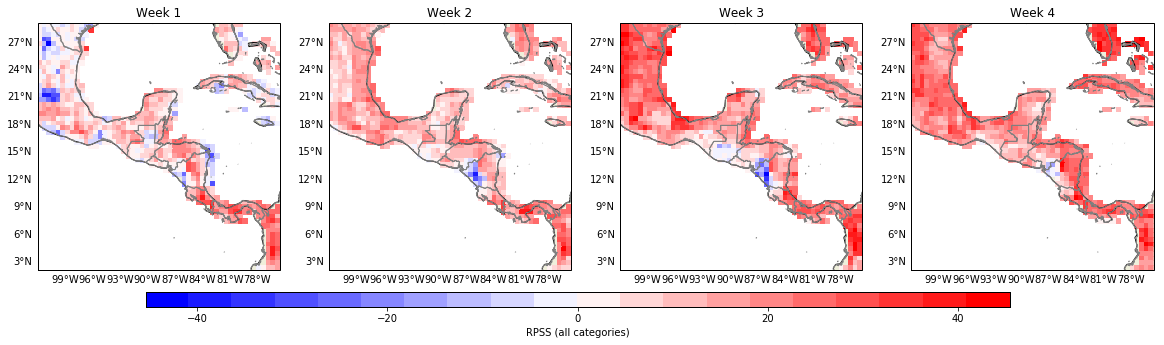

----------------------------------------------



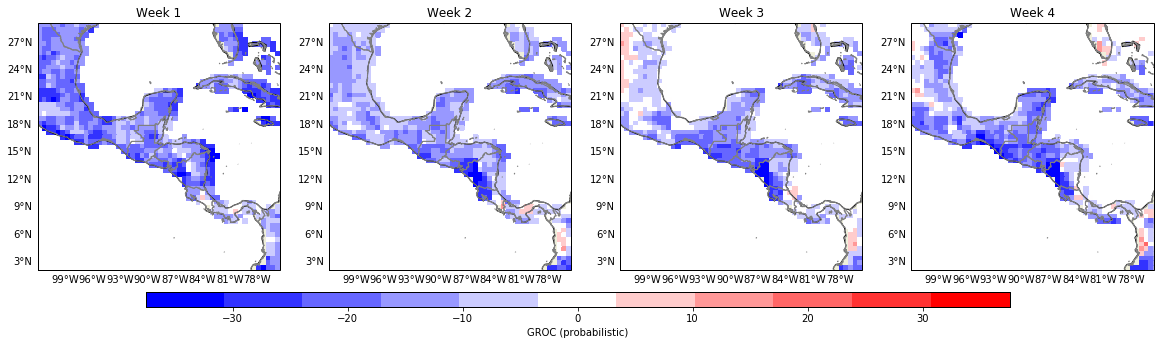

----------------------------------------------






In [5]:
print("New folder:")
%cd $workdir/output

#Methods to compare:
method1='noMOS'
method2='CCA'

# # Skill scores loop
# print('\033[1mMethod: '+method1+' \033[0;0m')
# plt.rcParams.update({'font.size': 10})
# for ime in ('Ignorance','RPSS','GROC'):
#     pltmap(ime,wlo2,elo2,sla2,nla2,fprefix,method1,training_season, mon, fday, nwk) 
#     plt.savefig(('Skill_'+method1 + ime + '.pdf'), dpi=300)
#     plt.show()
#     print('----------------------------------------------')
#     print('')
    
# print('')
# print('')
# print('')

# print('\033[1mMethod: '+method2+' \033[0;0m')
# for ime in ('Ignorance','RPSS','GROC'):
#     pltmap(ime,wlo2,elo2,sla2,nla2,fprefix,method2,training_season, mon, fday, nwk) 
#     plt.savefig(('Skill_'+method2 + ime + '.pdf'), dpi=300)
#     plt.show()
#     print('----------------------------------------------')
#     print('')
    
# print('')
# print('')
# print('')

print('\033[1mDifference: '+method2+'-'+method1+' \033[0;0m')
for ime in ('Ignorance','RPSS','GROC'):
    pltmapdiff(ime,wlo2,elo2,sla2,nla2,fprefix,method1,method2,training_season, mon, fday, nwk) 
    plt.savefig(('Skilldiff_' + ime + '.pdf'), dpi=300)
    plt.show()
    print('----------------------------------------------')
    print('')
    
print('')
print('')
print('')